In [281]:
import pickle
import PIL
import numpy as np
from sklearn.model_selection import train_test_split
import math
import pandas as pd
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Pawel/anaconda3/envs/keras/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [282]:
# TODO: Build a two-layer feedforward neural network with Keras here.
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Dropout, MaxPooling2D, Conv2D, Flatten

## Preprocess the Data

Now that you've loaded the training data, preprocess the data such that it's in the range between -0.5 and 0.5.

In [283]:
names=['center', 'left', 'right', 'angle',
                            'throttle', 'brake', 'speed']

In [284]:
df = pd.read_csv('data/driving_log.csv')
train, test = train_test_split(df, test_size = 0.2)

In [291]:
test.head()

,center,left,right,steering,throttle,brake,speed
4294,IMG/center_2016_12_01_13_39_53_519.jpg,IMG/left_2016_12_01_13_39_53_519.jpg,IMG/right_2016_12_01_13_39_53_519.jpg,0.000000,0.000000,0.0,25.80807
2933,IMG/center_2016_12_01_13_37_35_505.jpg,IMG/left_2016_12_01_13_37_35_505.jpg,IMG/right_2016_12_01_13_37_35_505.jpg,0.000000,0.985533,0.0,30.18664
7902,IMG/center_2016_12_01_13_46_28_277.jpg,IMG/left_2016_12_01_13_46_28_277.jpg,IMG/right_2016_12_01_13_46_28_277.jpg,0.000000,0.000000,0.0,25.58457
1705,IMG/center_2016_12_01_13_35_31_127.jpg,IMG/left_2016_12_01_13_35_31_127.jpg,IMG/right_2016_12_01_13_35_31_127.jpg,0.071328,0.985533,0.0,30.18530
5941,IMG/center_2016_12_01_13_43_09_347.jpg,IMG/left_2016_12_01_13_43_09_347.jpg,IMG/right_2016_12_01_13_43_09_347.jpg,-0.145206,0.985533,0.0,30.18619


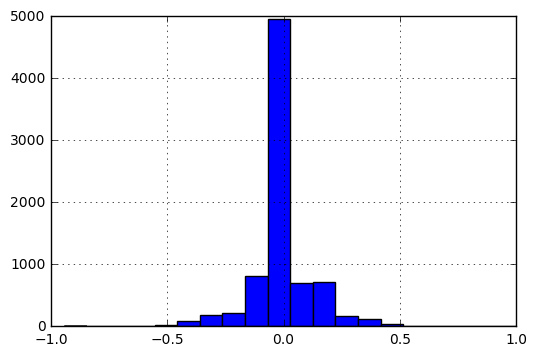

In [286]:
df.steering.hist(bins=20)

In [287]:
print (df.steering.mean(), df.steering.std())

0.00406964406483 0.128840072498


In [301]:
def get_data(df):
    X = []
    y = []
    for item in df[['center', 'steering']].iterrows():
        X.append(Image.open('data/' + item[1].center))
        y.append(item[1].steering)
    y = np.array(y)
    X = np.array([np.array(img) for img in X])
    X = np.array(X)/255. - 0.5
    return X, y

In [302]:
val_data = get_data(test)

In [303]:
def data_generator(df, batch_size=32):
    df.reset_index(inplace=True, drop=True)
    n_iter = math.ceil(df.shape[0]/batch_size)
    while 1:
        for i in range(n_iter)[::-1]:
            start = i*batch_size
            end = start + batch_size - 1
            yield get_data(df.loc[start:end])


## Train the Network


In [304]:
# TODO: Re-construct the network and add dropout after the pooling layer.

model = Sequential()
model.add(Conv2D(4, 5, 5, input_shape=(160, 320, 3)))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(1, init='normal'))

model.summary()
# TODO: Compile and train the model here.
model.compile(loss='mean_squared_error',
              optimizer='adam')

history = model.fit_generator(data_generator(train), samples_per_epoch = train.shape[0],
                              nb_epoch = 2, validation_data=val_data,
                              verbose=2)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 156, 316, 4)   304         convolution2d_input_11[0][0]     
____________________________________________________________________________________________________
maxpooling2d_11 (MaxPooling2D)   (None, 78, 158, 4)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 78, 158, 4)    0           maxpooling2d_11[0][0]            
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 78, 158, 4)    0           dropout_11[0][0]                 
___________________________________________________________________________________________

## Optimization


In [14]:
model.save_weights('model.h5')

In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [15]:
import json
with open('model.json', 'w') as outfile:
    json.dump(model.to_json(), outfile)

**Best Validation Accuracy:** (fill in here)

## Testing
Once you've picked out your best model, it's time to test it.

Load up the test data and use the [`evaluate()` method](https://keras.io/models/model/#evaluate) to see how well it does.

Hint 1: The `evaluate()` method should return an array of numbers. Use the `metrics_names()` method to get the labels.

**Test Accuracy:** (fill in here)

## Summary
Keras is a great tool to use if you want to quickly build a neural network and evaluate performance.